### Data and model

In [1]:
import psycopg2

In [2]:
con = psycopg2.connect(user = "postgres",
                       password = "",
                       host = "127.0.0.1",
                       port = "5432",
                       database = "adj_noun_pairs")

try:
    cursor = con.cursor();
except (Exception, psycopg2.Error) as error:
    print("Error in Connection",error)

In [3]:
try:
    cursor.execute("SELECT * FROM pair_counts")
    all_pairs = cursor.fetchall() 
except (Exception, psycopg2.Error) as error:
    con.rollback()
    print("Error while inserting data into the table:", error)

In [9]:
try:
    cursor.execute("SELECT DISTINCT noun FROM pair_counts")
    nouns = cursor.fetchall() 
except (Exception, psycopg2.Error) as error:
    con.rollback()
    print("Error while inserting data into the table:", error)

In [12]:
nouns = [noun[0] for noun in nouns]

In [13]:
try:
    cursor.execute("SELECT DISTINCT adjective FROM pair_counts")
    adjectives = cursor.fetchall() 
except (Exception, psycopg2.Error) as error:
    con.rollback()
    print("Error while inserting data into the table:", error)

In [14]:
adjectives = [adj[0] for adj in adjectives]

In [4]:
import pandas as pd

In [15]:
data = pd.DataFrame(None, index=nouns, columns=adjectives)
data.head()

,topeltõieline,halvaksläinud,kaaskondne,stabiilne,Uraali-tagune,alasti,kärniline,hoovav,sellekevadine,mässav,...,sõnaosav,jäetud,elektrontorm,beež,kardiokirurgiline,teadlik,käskkirjaline,kombanud,kaame,kevadöine
isetegevuslane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
külgaken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
läbivaatamine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kuulsus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
for tup in all_pairs:
    data.loc[tup[1], tup[0]] = tup[2]

In [17]:
data = data.fillna(0)
data.head()

,topeltõieline,halvaksläinud,kaaskondne,stabiilne,Uraali-tagune,alasti,kärniline,hoovav,sellekevadine,mässav,...,sõnaosav,jäetud,elektrontorm,beež,kardiokirurgiline,teadlik,käskkirjaline,kombanud,kaame,kevadöine
isetegevuslane,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
stress,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
külgaken,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
läbivaatamine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kuulsus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

In [24]:
lda = LatentDirichletAllocation(n_components=500)

In [25]:
lda.fit_transform(data)

array([[1.00000000e-03, 1.00000000e-03, 1.00000000e-03, ...,
        1.00000000e-03, 1.00000000e-03, 1.00000000e-03],
       [1.00000000e-03, 1.00000000e-03, 1.00000000e-03, ...,
        1.00000000e-03, 1.00000000e-03, 1.00000000e-03],
       [5.00000000e-04, 5.00000000e-04, 5.00000000e-04, ...,
        5.00000000e-04, 5.00000000e-04, 5.00000000e-04],
       ...,
       [4.00000000e-04, 4.00000000e-04, 4.00000000e-04, ...,
        4.00000000e-04, 4.00000000e-04, 4.00000000e-04],
       [9.09090909e-05, 9.09090909e-05, 9.09090909e-05, ...,
        9.09090909e-05, 9.09090909e-05, 9.09090909e-05],
       [1.00000000e-03, 1.00000000e-03, 1.00000000e-03, ...,
        1.00000000e-03, 1.00000000e-03, 1.00000000e-03]])

In [26]:
topics = {}
for i in range(500):
    topics[i] = []

topic_probs = lda.transform(data)
for i, prob in enumerate(topic_probs):
    topics[np.argmax(prob)].append(data.index[i])

In [27]:
empty = 0

for i in range(500):
    if len(topics[i]) == 0:
        empty += 1
        
empty

21

In [31]:
topics[1]

['teadmatus', 'khaaniperekond', 'rannik', 'mägijärv', 'urgas', 'mäekuru']

### Heatmap

In [40]:
import seaborn as sns
from matplotlib import pyplot as plt

In [34]:
type(topic_probs)

numpy.ndarray

In [37]:
data_pd_lda_features = pd.DataFrame(topic_probs)
data_pd_lda_features.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.00100,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
1,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.00100,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
2,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.00050,0.000500,0.000500,0.000500,...,0.000500,0.250500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500
3,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.00100,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
4,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.06265,0.000111,0.000111,0.000111,...,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111


<AxesSubplot:>

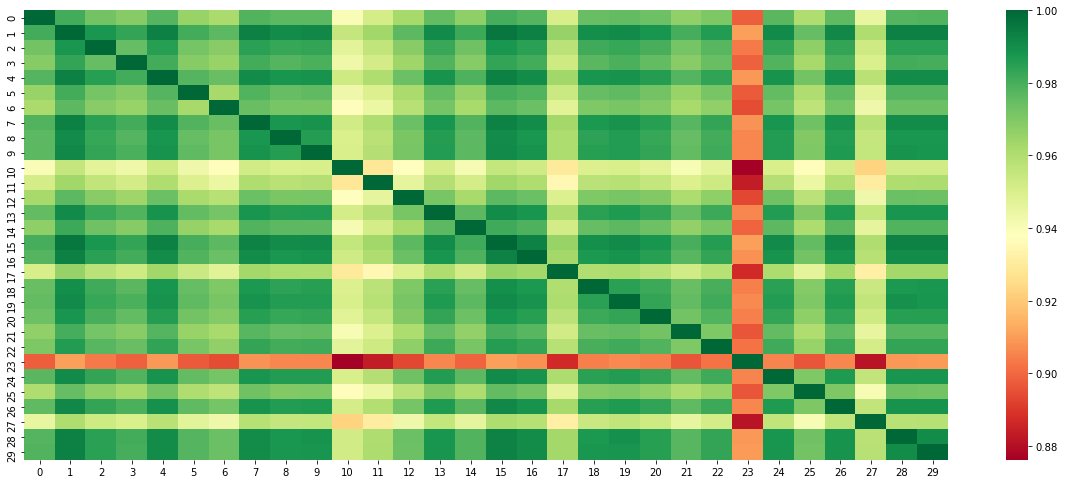

In [45]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20.7, 8.27)
sns.heatmap(data_pd_lda_features[list(range(30))].corr(method = 'spearman'), cmap="RdYlGn", ax = ax)

### With fewer words

In [48]:
to_use = []

for noun in data.index:
    if len([val for val in data.loc[noun] if val != 0]) >= 10:
        to_use.append(noun)

In [49]:
new_data = data.loc[to_use]

In [50]:
lda2 = LatentDirichletAllocation(n_components=100)

In [51]:
lda2.fit_transform(new_data)

array([[5.55555556e-04, 5.55555556e-04, 5.55555556e-04, ...,
        5.55555556e-04, 5.68150182e-01, 5.55555556e-04],
       [3.03030303e-04, 3.03030303e-04, 3.03030303e-04, ...,
        3.03030303e-04, 3.03030303e-04, 3.03030303e-04],
       [5.55555556e-04, 5.55555556e-04, 5.55555556e-04, ...,
        5.55555556e-04, 5.55555556e-04, 5.55555556e-04],
       ...,
       [6.66666667e-04, 6.66666667e-04, 6.66666667e-04, ...,
        6.66666667e-04, 6.66666667e-04, 6.66666667e-04],
       [7.69230769e-04, 7.69230769e-04, 7.69230769e-04, ...,
        7.69230769e-04, 7.69230769e-04, 7.69230769e-04],
       [4.54545455e-04, 4.54545455e-04, 4.54545455e-04, ...,
        4.54545455e-04, 4.54545455e-04, 4.54545455e-04]])

In [52]:
topics2 = {}
for i in range(100):
    topics2[i] = []

topic_probs2 = lda2.transform(new_data)
for i, prob in enumerate(topic_probs2):
    topics2[np.argmax(prob)].append(new_data.index[i])

In [53]:
data_pd_lda_features2 = pd.DataFrame(topic_probs2)
data_pd_lda_features2.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,...,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.568150,0.000556
1,0.000303,0.000303,0.000303,0.000303,0.000303,0.000303,0.000303,0.000303,0.000303,0.000303,...,0.627060,0.000303,0.000303,0.000303,0.000303,0.000303,0.000303,0.000303,0.000303,0.000303
2,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,...,0.153966,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556
3,0.000127,0.000127,0.000127,0.000127,0.000127,0.000127,0.000127,0.000127,0.000127,0.000127,...,0.000127,0.000127,0.000127,0.000127,0.000127,0.000127,0.000127,0.000127,0.000127,0.000127
4,0.000256,0.000256,0.000256,0.000256,0.000256,0.000256,0.000256,0.000256,0.000256,0.000256,...,0.000256,0.000256,0.000256,0.000256,0.000256,0.000256,0.000256,0.000256,0.000256,0.000256


<AxesSubplot:>

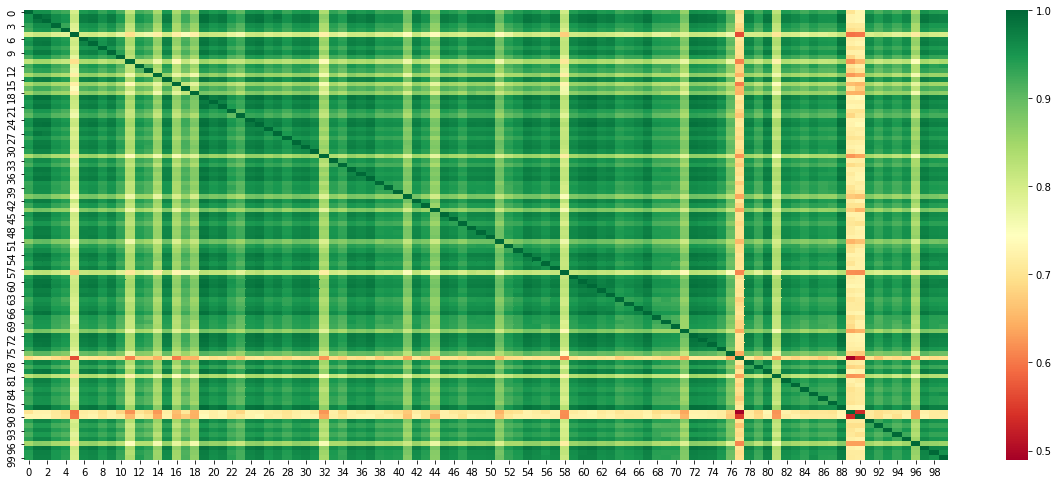

In [57]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20.7, 8.27)
sns.heatmap(data_pd_lda_features2.corr(method = 'spearman'), cmap="RdYlGn", ax = ax)

### With fewer words and higher pair counts

In [77]:
to_use_new = []

for noun in data.index:
    if len([val for val in data.loc[noun] if val >= 5]) >= 5:
        to_use_new.append(noun)

In [78]:
len(to_use_new)

57

In [85]:
lda3 = LatentDirichletAllocation(n_components=5, random_state=17)
lda3.fit_transform(data.loc[to_use_new])

array([[3.20621489e-04, 3.16045990e-04, 3.20422881e-04, 9.98729424e-01,
        3.13485904e-04],
       [6.85124923e-04, 6.73904836e-04, 4.95957733e-01, 5.02011662e-01,
        6.71575408e-04],
       [1.43118523e-01, 2.63717806e-02, 7.67239399e-01, 6.26918915e-02,
        5.78405561e-04],
       [9.94434194e-01, 1.39230378e-03, 1.39323786e-03, 1.39320446e-03,
        1.38705977e-03],
       [3.37222031e-04, 3.33669661e-04, 3.34937516e-04, 9.98662769e-01,
        3.31401793e-04],
       [5.06813097e-01, 1.24939690e-03, 2.12781995e-01, 2.77912157e-01,
        1.24335492e-03],
       [8.49673842e-01, 2.06030671e-04, 2.06482684e-04, 1.49709240e-01,
        2.04405029e-04],
       [5.16522173e-01, 1.72110984e-01, 3.07554864e-01, 1.92438641e-03,
        1.88759371e-03],
       [1.27959743e-03, 1.27218451e-03, 1.29026017e-03, 9.94893468e-01,
        1.26449026e-03],
       [8.97972258e-01, 7.35412827e-04, 4.08625268e-02, 5.97018279e-02,
        7.27974814e-04],
       [8.21228000e-01, 7.5197

In [86]:
topics_test = {}
for i in range(5):
    topics_test[i] = []

test = data.loc[to_use_new]
    
topic_probs_test = lda3.transform(test)
for i, prob in enumerate(topic_probs_test):
    topics_test[np.argmax(prob)].append(test.index[i])

In [87]:
print([len(topic) for topic in topics_test.values()])

[21, 7, 8, 17, 4]


In [94]:
topics_test[1]

['käsi', 'silm', 'juus', 'pilk', 'hääl', 'nägu', 'samm']

In [97]:
topics_test[2]

['tee', 'aeg', 'päev', 'töö', 'öö', 'aasta', 'õhtu', 'hetk']

In [99]:
topics_test[3]

['elu',
 'kord',
 'asi',
 'võimalus',
 'nimi',
 'mõte',
 'armastus',
 'maailm',
 'jõud',
 'maa',
 'keha',
 'komme',
 'jutt',
 'olukord',
 'küsimus',
 'sõna',
 'rahvas']

In [95]:
data_pd_lda_features3 = pd.DataFrame(topic_probs_test)
data_pd_lda_features3.head()

,0,1,2,3,4
0,0.000321,0.000316,0.000320,0.998729,0.000313
1,0.000685,0.000674,0.495958,0.502012,0.000672
2,0.143119,0.026372,0.767239,0.062692,0.000578
3,0.994434,0.001392,0.001393,0.001393,0.001387
4,0.000337,0.000334,0.000335,0.998663,0.000331


<AxesSubplot:>

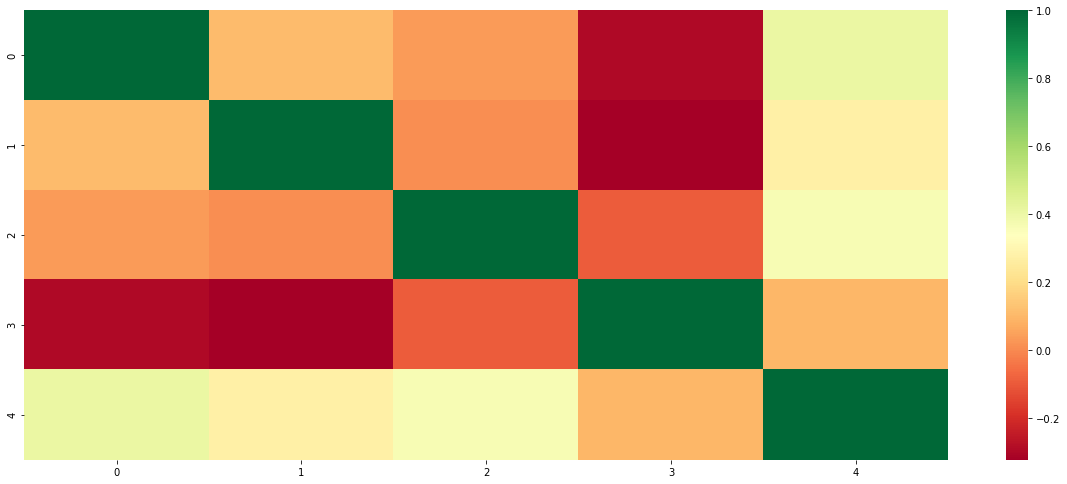

In [96]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20.7, 8.27)
sns.heatmap(data_pd_lda_features3.corr(method = 'spearman'), cmap="RdYlGn", ax = ax)